# Importing libraries

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.linear_model import LinearRegression

# Importing data

In [2]:
startup_50 = pd.read_csv("data/50_Startups.csv")

In [3]:
startup_50.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
startup_50.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

# Visualization

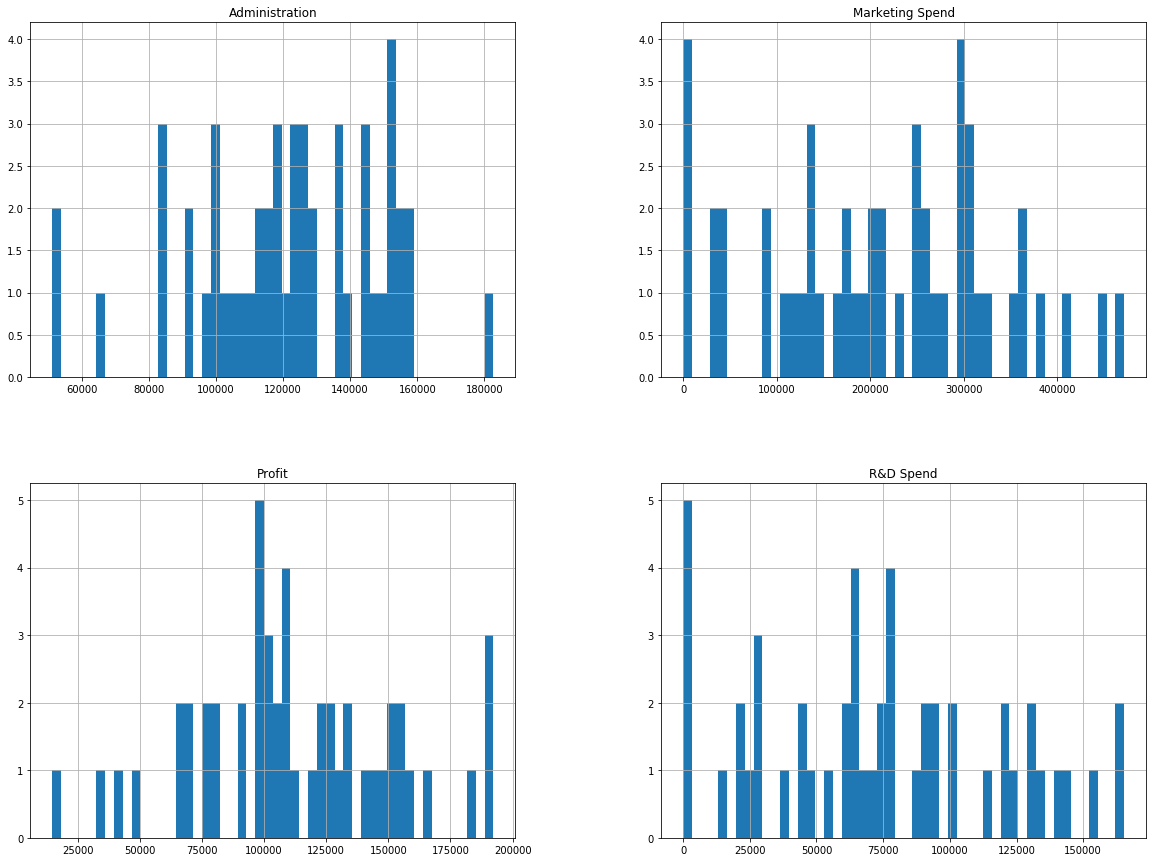

In [5]:
startup_50.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

/Applications/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


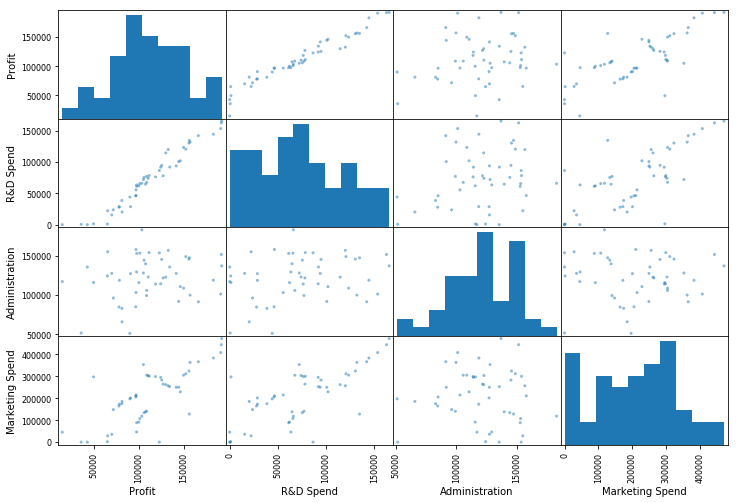

In [6]:
from pandas.tools.plotting import scatter_matrix
attributes = ["Profit", "R&D Spend","Administration","Marketing Spend"]
scatter_matrix(startup_50[attributes], figsize=(12, 8))
plt.savefig('matrix.png')

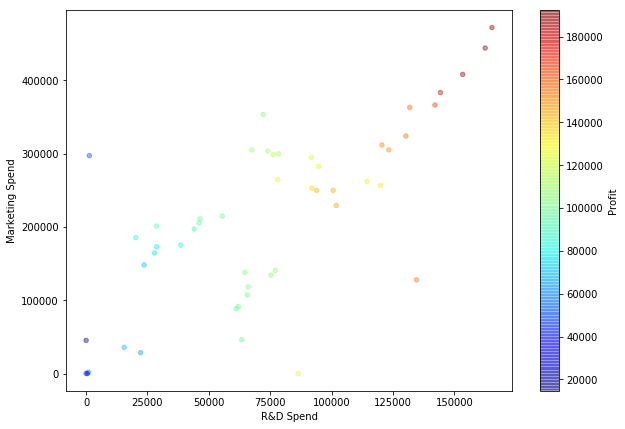

In [7]:
startup_50.plot(kind="scatter", x="R&D Spend", y="Marketing Spend", alpha=0.4, figsize=(10,7),
    c="Profit", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

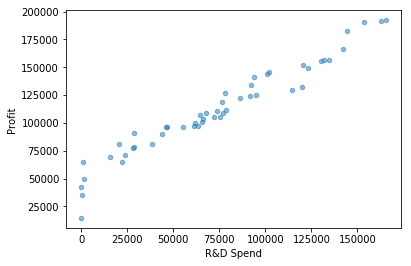

In [8]:
startup_50.plot(kind="scatter", x="R&D Spend", y="Profit", alpha=0.5)
plt.savefig('scatter.png')

# Correlation between independent variables and dependent variable

In [9]:
corr_matrix = startup_50.corr()
corr_matrix["Profit"].sort_values(ascending=False)

Profit             1.000000
R&D Spend          0.972900
Marketing Spend    0.747766
Administration     0.200717
Name: Profit, dtype: float64

# Drop variables with no linear correlation

In [10]:
startup_50 = startup_50.drop(['Administration'],axis=1)
startup_50.head()

,R&D Spend,Marketing Spend,State,Profit
0,165349.20,471784.10,New York,192261.83
1,162597.70,443898.53,California,191792.06
2,153441.51,407934.54,Florida,191050.39
3,144372.41,383199.62,New York,182901.99
4,142107.34,366168.42,Florida,166187.94


# Dummy coding categorical variables

In [11]:
x = startup_50.iloc[:,:-1]
y = startup_50.iloc[:,-1]

In [12]:
n = pd.get_dummies(startup_50.State)
x = pd.concat([x, n], axis=1)

In [13]:
x = x.drop(['State'],axis=1)
x.head()

,R&D Spend,Marketing Spend,California,Florida,New York
0,165349.20,471784.10,0,0,1
1,162597.70,443898.53,1,0,0
2,153441.51,407934.54,0,1,0
3,144372.41,383199.62,0,0,1
4,142107.34,366168.42,0,1,0


# Splitting data into train and test 

In [15]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Fitting Multiple Linear Regression to the Train

In [16]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Predicting the results on test

In [17]:
y_pred = regressor.predict(X_test)

# goodness of the model

In [18]:
#Calculate R squared:
print('Linear Regression R squared": %.4f' % regressor.score(X_test, y_test))

Linear Regression R squared": 0.9447


In [19]:
#Calculate root-mean-square error (RMSE)
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)

Linear Regression RMSE: 8409.9167


In [20]:
#Calculate mean absolute error (MAE):
from sklearn.metrics import mean_absolute_error
lin_mae = mean_absolute_error(y_pred, y_test)
print('Linear Regression MAE: %.4f' % lin_mae)

Linear Regression MAE: 7109.1620


In [21]:
#Calculate Variance explained
from sklearn.metrics import explained_variance_score
Vs = explained_variance_score(y_test,y_pred)
print('Variance Explained: %.4f' % Vs)

Variance Explained: 0.9546
